In [29]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

-----

# Multivariate Linear Regresion

In [3]:
# Normal form
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.88984612],
       [3.10307354]])

In [7]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.

In [8]:
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 3.88984612 and θ1 = 3.10307354 Close
# enough, but the noise made it impossible to recover the exact parameters of the origi‐
# nal function.

In [9]:
# Two new predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.88984612],
       [10.09599319]])

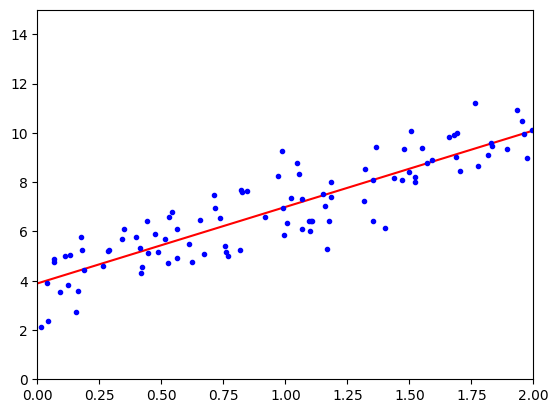

In [14]:
# Prediction vs data plot
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

-----

# Linear Regression on Scikit Learn

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.88984612],
       [10.09599319]])

In [17]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (the
# name stands for “least squares”), which you could call directly:

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.88984612],
       [3.10307354]])

In [20]:
# This algorithm works with the pseudoinverse form instead of the normal form
np.linalg.pinv(X_b).dot(y)

array([[3.88984612],
       [3.10307354]])

-----

# Gradient Descendent

In [21]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
# We found the same solution!
theta

array([[3.88984612],
       [3.10307354]])

----

# Stochastic Gradient Descend

In [24]:
# own made 
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [26]:
# Very close
theta

array([[3.86529641],
       [3.12394815]])

In [28]:
# Scikit learn SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.79799112]), array([3.013281]))

-----

# Polinomial Regression

In [30]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.2838026])

In [31]:
X_poly[0]

array([0.2838026 , 0.08054391])